In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv("accepted_2007_to_2018Q2.csv")

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Analysis & Feature Engineering

In [4]:
df.shape #gives the nummber of rows and columns of the dataset

(2004091, 151)

In [5]:
missing_data_pct = df.isna().mean().sort_values(ascending=False) #identifies the missing values

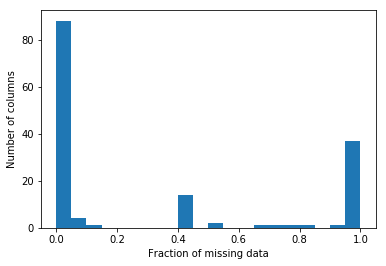

In [6]:
plt.hist(missing_data_pct, bins=20);
plt.xlabel("Fraction of missing data");
plt.ylabel("Number of columns");

In [7]:
columns_to_drop = missing_data_pct[missing_data_pct>0.2].index #drops the columns where missing values are above 20%

In [8]:
len(columns_to_drop)

58

In [9]:
df_loan = df.drop(labels = columns_to_drop, axis=1)

In [10]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,Nov-2017,684.0,680.0,0.0,1.0,Individual,0.0,0.0,149140.0,184500.0,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
1,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,Feb-2017,564.0,560.0,0.0,1.0,Individual,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,1.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
2,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,6 years,RENT,63800.0,Source Verified,Dec-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,658xx,MO,18.49,0.0,Aug-2003,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,w,0.00,0.00,25512.20,25512.20,21425.00,4087.20,0.0,0.00,0.0000,May-2016,17813.19,Dec-2017,704.0,700.0,0.0,1.0,Individual,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,Cash,N
3,37612354,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000.0,Verified,Dec-2014,Current,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car financing,953xx,CA,8.31,1.0,Oct-2000,665.0,669.0,0.0,8.0,0.0,5753.0,100.9,13.0,w,6673.54,6673.54,11207.67,11207.67,6126.46,5081.21,0.0,0.00,0.0000,Dec-2017,319.08,Dec-2017,629.0,625.0,0.0,1.0,Individual,0.0,0.0,261815.0,5700.0,2.0,32727.0,0.0,103.2,0.0,0.0,16.0,170.0,21.0,16.0,5.0,21.0,1.0,1.0,3.0,5.0,3.0,5.0,1.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,0.0,76.9,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0,N,Cash,N
4,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,< 1 year,RENT,50000.0,Source Verified,Dec-2014,Charged Off,n,https://lendingclub.co

In [11]:
df_loan['loan_status'].unique() #return values of columns

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [12]:
df_loan['loan_status'].value_counts(dropna=False)

Current                                                1108697
Fully Paid                                              673112
Charged Off                                             170822
Late (31-120 days)                                       27678
In Grace Period                                          13775
Late (16-30 days)                                         7157
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     72
NaN                                                         29
Name: loan_status, dtype: int64

In [13]:
df_loan = df_loan.loc[df['loan_status'].isin(["Fully Paid", "Charged Off"])] #consider only the Fully Paid or Charged off
df_loan["default"] = df_loan["loan_status"].replace({"Fully Paid": 0, "Charged Off": 1}) #set them to 0 or 1

In [14]:
len(df_loan)

843934

In [15]:
df_loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [16]:
df_loan['loan_status'].value_counts(dropna=False)

Fully Paid     673112
Charged Off    170822
Name: loan_status, dtype: int64

In [17]:
df_loan['grade'].value_counts(dropna = False)

B    243298
C    233576
A    139520
D    132651
E     65166
F     23533
G      6190
Name: grade, dtype: int64

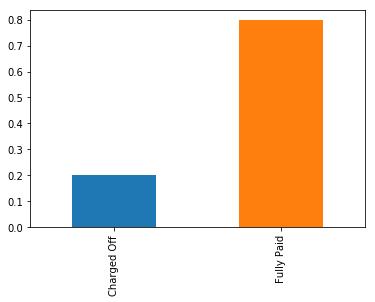

In [18]:
(df_loan['loan_status'].value_counts(normalize=True, dropna=False).sort_index()).plot.bar(stacked=True);

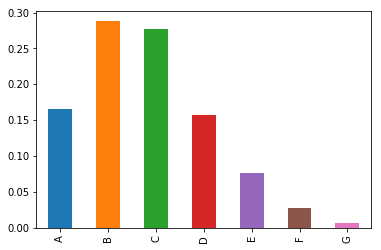

In [19]:
(df_loan['grade'].value_counts(normalize=True, dropna=False).sort_index()).plot.bar(stacked=True);

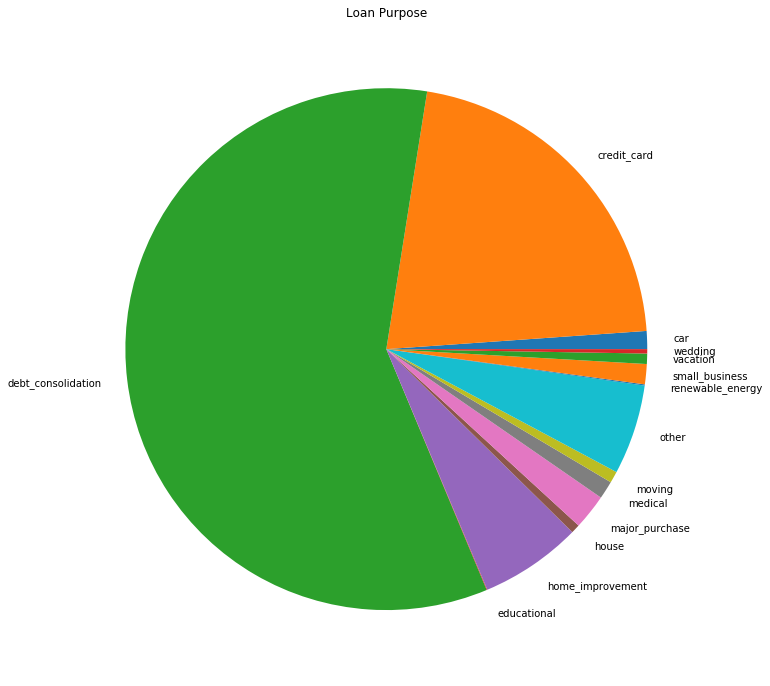

In [20]:
(df_loan['purpose'].value_counts(normalize=True, dropna=False).sort_index()).plot.pie(figsize=(12,12));
plt.ylabel("");
plt.title('Loan Purpose');

In [21]:
df_loan['loan_amnt'].describe()

count    843934.000000
mean      14322.610506
std        8560.537426
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

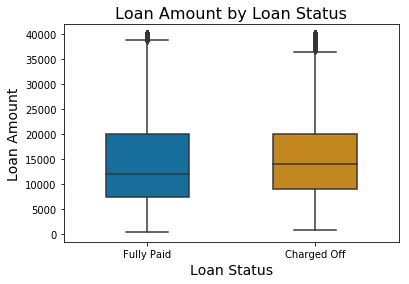

In [22]:
bplot = sns.boxplot(y=df_loan['loan_amnt'], x=df_loan['loan_status'], data=df_loan, width=0.5,palette="colorblind");
bplot.axes.set_title("Loan Amount by Loan Status",fontsize=16);
bplot.set_xlabel("Loan Status",fontsize=14);
bplot.set_ylabel("Loan Amount",fontsize=14);

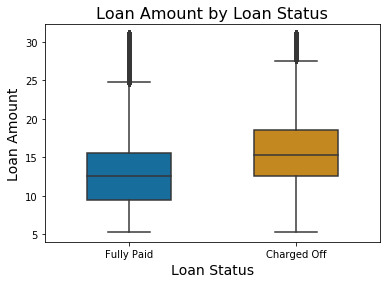

In [23]:
bplot = sns.boxplot(y=df_loan['int_rate'], x=df_loan['loan_status'], data=df_loan, width=0.5,palette="colorblind");
bplot.axes.set_title("Int Rate by Loan Status",fontsize=16);
bplot.set_xlabel("Loan Status",fontsize=14);
bplot.set_ylabel("Int Rate",fontsize=14);

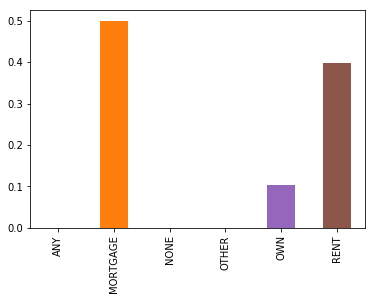

In [24]:
(df_loan['home_ownership'].value_counts(normalize=True, dropna=False).sort_index()).plot.bar(stacked=True);

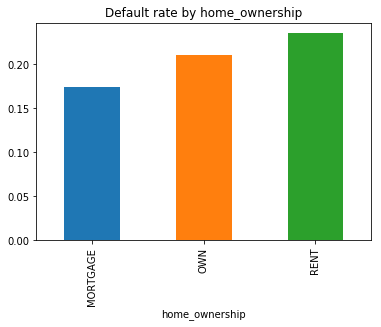

In [25]:
df_loan[df_loan['home_ownership'].isin(['MORTGAGE','OWN','RENT'])].groupby('home_ownership')['default'].mean().plot.bar();
plt.title("Default rate by home_ownership");

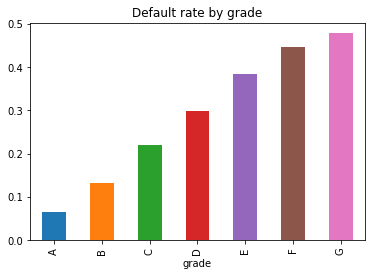

In [26]:
df_loan.groupby('grade')['default'].mean().plot.bar();
plt.title("Default rate by grade");

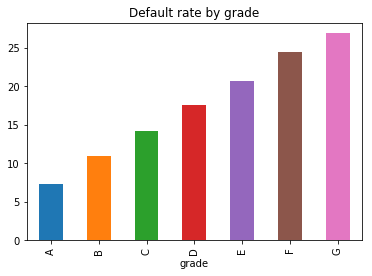

In [27]:
df_loan.groupby('grade')['int_rate'].mean().plot.bar();
plt.title("Default rate by grade");

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df_loan.groupby('sub_grade')['default'].mean().values.reshape(-1,1)
y = y=df.groupby('sub_grade')['int_rate'].mean()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print("Coefficient : ", lr.coef_)
print("Intercept : ", lr.intercept_)
print("Correlation : ", lr.score(X,y))

Coefficient :  [48.18830023]
Intercept :  3.8489916672444426
Correlation :  0.9893227717891525


Text(0, 0.5, 'interest rate')

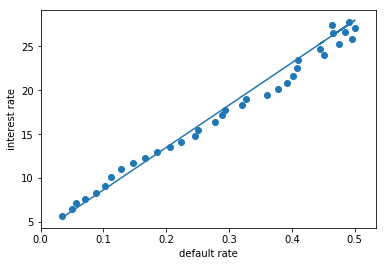

In [30]:
plt.scatter(df_loan.groupby('sub_grade')['default'].mean(), df_loan.groupby('sub_grade')['int_rate'].mean())
plt.plot(df_loan.groupby('sub_grade')['default'].mean(), lr.predict(df_loan.groupby('sub_grade')['default'].mean().values.reshape(-1,1)))
plt.xlabel('default rate')
plt.ylabel('interest rate')

# Prediction Algorithms

In [31]:
columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low','fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc','default']
df = df_loan[columns].dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798933 entries, 0 to 2004088
Data columns (total 22 columns):
loan_amnt              798933 non-null float64
term                   798933 non-null object
int_rate               798933 non-null float64
installment            798933 non-null float64
grade                  798933 non-null object
emp_length             798933 non-null object
home_ownership         798933 non-null object
annual_inc             798933 non-null float64
verification_status    798933 non-null object
purpose                798933 non-null object
addr_state             798933 non-null object
dti                    798933 non-null float64
delinq_2yrs            798933 non-null float64
fico_range_low         798933 non-null float64
fico_range_high        798933 non-null float64
inq_last_6mths         798933 non-null float64
open_acc               798933 non-null float64
pub_rec                798933 non-null float64
revol_bal              798933 non-null float64
re

In [33]:
df['term'] = df['term'].replace({" 60 months": 60, " 36 months": 36})
df['grade'] = df['grade'].replace({"A":1, "B":2, "C":3, "D": 4, "E":5, "F":6, "G":7})
df['emp_length']=df['emp_length'].apply(lambda x : 10 if x[2]=='+' else 0 if x[0]=='<' else int(x[0]))
df['verification_status']=df['verification_status'].replace({"Verified":1, "Source Verified": 1, "Not Verified": 0})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798933 entries, 0 to 2004088
Data columns (total 22 columns):
loan_amnt              798933 non-null float64
term                   798933 non-null int64
int_rate               798933 non-null float64
installment            798933 non-null float64
grade                  798933 non-null int64
emp_length             798933 non-null int64
home_ownership         798933 non-null object
annual_inc             798933 non-null float64
verification_status    798933 non-null int64
purpose                798933 non-null object
addr_state             798933 non-null object
dti                    798933 non-null float64
delinq_2yrs            798933 non-null float64
fico_range_low         798933 non-null float64
fico_range_high        798933 non-null float64
inq_last_6mths         798933 non-null float64
open_acc               798933 non-null float64
pub_rec                798933 non-null float64
revol_bal              798933 non-null float64
revol_

In [35]:
df_dummies = pd.get_dummies(df)

In [36]:
dummies_to_drop = df_dummies.columns[(df_dummies.mean()<0.005)]
df_dummies = df_dummies.drop(dummies_to_drop, axis=1)

In [37]:
df_dummies.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,default,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_WA,addr_state_WI
0,15000.0,60,12.39,336.64,3,10,78000.0,1,12.03,0.0,750.0,754.0,0.0,6.0,0.0,138008.0,29.0,17.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10400.0,36,6.99,321.08,1,8,58000.0,0,14.92,0.0,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21425.0,60,15.59,516.36,4,6,63800.0,1,18.49,0.0,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7650.0,36,13.66,260.20,3,0,50000.0,1,34.81,0.0,685.0,689.0,1.0,11.0,0.0,16822.0,91.9,20.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,9600.0,36,13.66,326.53,3,10,69000.0,1,25.81,0.0,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df_dummies.drop("default", axis=1)
y = df_dummies['default']

In [39]:
from sklearn import preprocessing

In [40]:
standard_scaler = preprocessing.StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA()

In [43]:
X_pca = pd.DataFrame(pca.fit_transform(X))

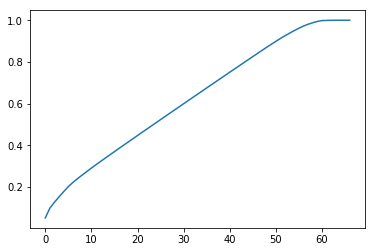

In [44]:
plt.plot(pca.explained_variance_ratio_.cumsum());

In [45]:
X_pca = X_pca.loc[:,:36]

In [46]:
X_pca.shape

(798933, 37)

# Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [49]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
logreg.score(X_test, y_test)

0.8026201602136182

In [51]:
y_hat = logreg.predict(X_test)
y_hat_probas = logreg.predict_proba(X_test)

In [52]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    192156
           1       0.52      0.07      0.13     47524

   micro avg       0.80      0.80      0.80    239680
   macro avg       0.66      0.53      0.51    239680
weighted avg       0.75      0.80      0.74    239680



ROC AUC score :  0.7062524198694023


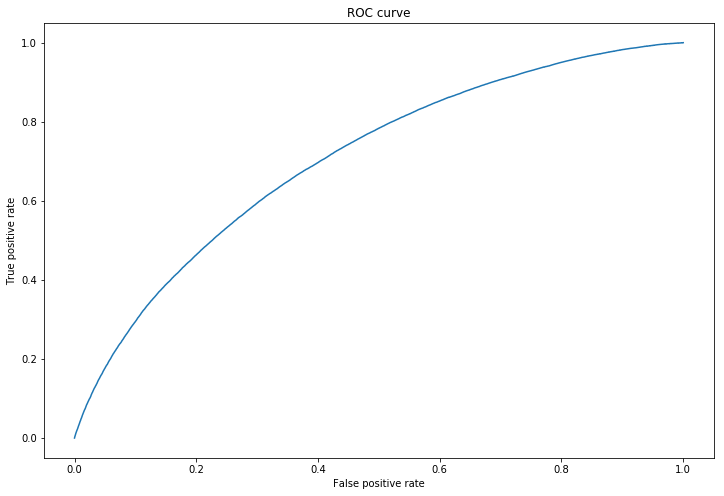

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probas[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr);
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate');
print("ROC AUC score : ",roc_auc_score(y_test, y_hat_probas[:,1]))

In [54]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(LogisticRegression(),grid,cv=5)
logreg_cv.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
logreg_cv.best_score_

0.8019268560025605

In [56]:
y_hat_cv = logreg_cv.predict(X_test)
y_hat_probas_cv = logreg_cv.predict_proba(X_test)

In [57]:
print(classification_report(y_test, y_hat_cv))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    192156
           1       0.52      0.07      0.13     47524

   micro avg       0.80      0.80      0.80    239680
   macro avg       0.66      0.53      0.51    239680
weighted avg       0.75      0.80      0.74    239680



In [58]:
print("Accuracy on test set: {:.3f}".format(logreg_cv.score(X_test,y_test)))

Accuracy on test set: 0.803


In [59]:
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test,y_test)))

Accuracy on test set: 0.803


# Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=100)

In [63]:
rfc.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
y_hat_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_hat_rfc))

In [ ]:
y_hat_rfc_probas = rfc.predict_proba(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_rfc_probas[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr);
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate');
print("ROC AUC score : ",roc_auc_score(y_test, y_hat_rfc_probas[:,1]))

In [ ]:
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test,y_test)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)

In [ ]:
gbc.fit(X_train,y_train)

In [ ]:
y_hat_gbc = gbc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_hat_gbc))

In [ ]:
y_hat_gbc_probas = gbc.predict_proba(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_gbc_probas[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr);
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate');
print("ROC AUC score : ",roc_auc_score(y_test, y_hat_gbc_probas[:,1]))

In [ ]:
print("Accuracy on test set: {:.3f}".format(gbc.score(X_test,y_test)))

# SVM

In [54]:
from sklearn import svm

In [ ]:
clf = svm.SVC()